# Lecture 9, the SVD

In [1]:
import numpy as np
import scipy.linalg as sla
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


## create and plot data

3


<IPython.core.display.Javascript object>


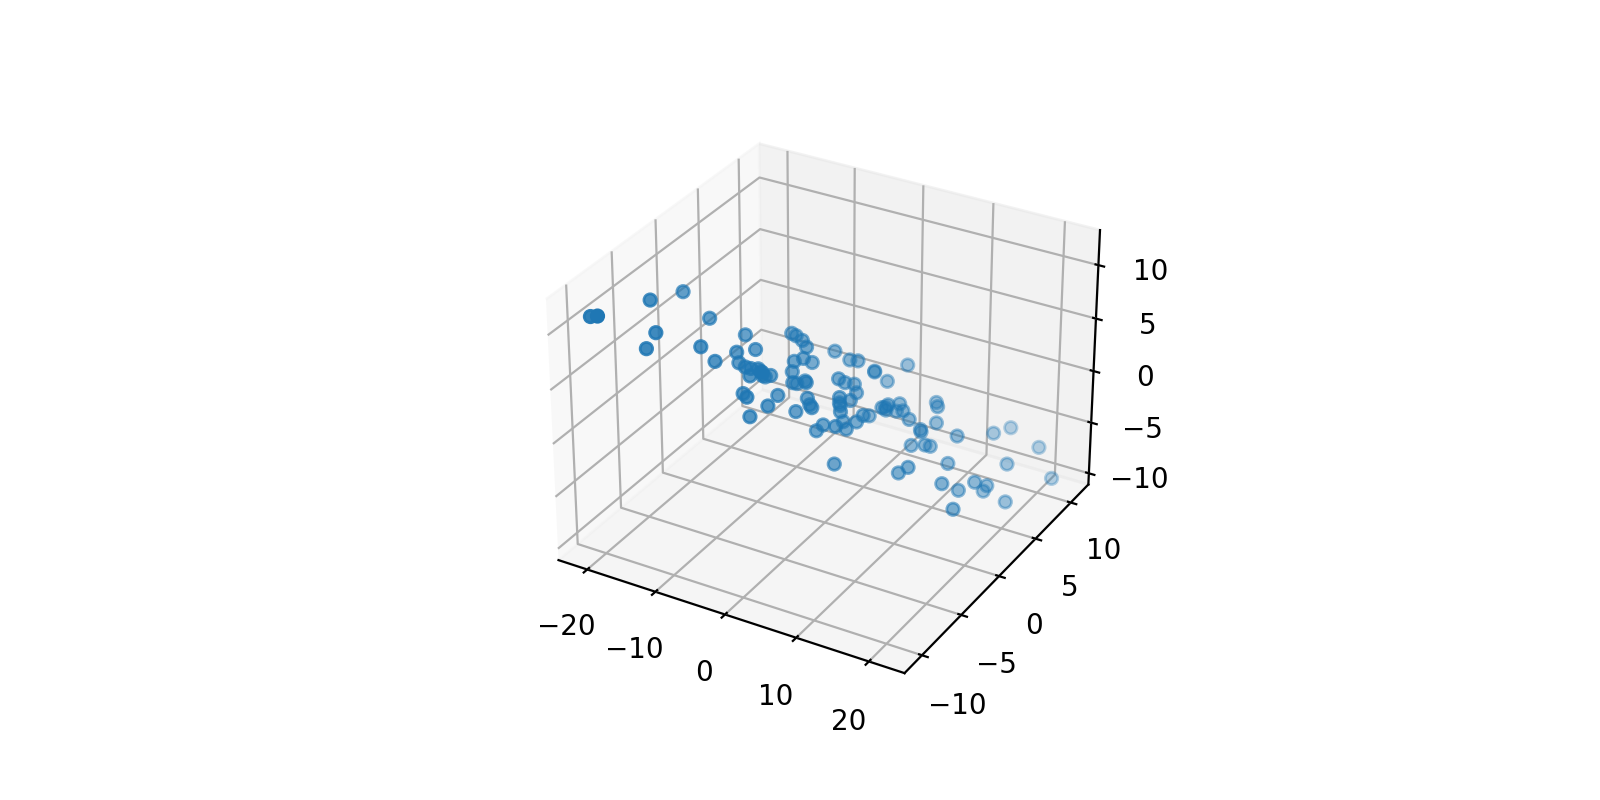

In [2]:
n = 100
p = 3
C = np.diag((np.array([10, 2, .5])))
A = sla.orth(np.random.rand(p,p))
#A = np.diag(np.array([1,1,1]))

noise = np.random.randn(n,p)@C@A;

X = np.vstack((np.linspace(-1,1,n), np.ones((2,n)))).T + noise;
print(la.matrix_rank(X))

%matplotlib notebook
fig = plt.figure(21)
ax = fig.add_subplot(111, projection="3d")
p = ax.scatter(X[:, 0], X[:, 1], X[:, 2])




## compute SVD and corresponding subspace approximations

[108.58655423  22.48975595   7.88678761]
[108.58655423  22.48975595   0.        ]
[[-4.94048767 -0.67043903  0.40287179]
 [10.10687705  0.03433555 -0.46713766]
 [19.09533973  4.48086248 -0.53350411]
 [19.67073598 -1.16299002  0.9626628 ]
 [ 2.82876956  4.37624255 -0.43325516]]
[[-4.94048767 -0.67043903  0.        ]
 [10.10687705  0.03433555  0.        ]
 [19.09533973  4.48086248  0.        ]
 [19.67073598 -1.16299002  0.        ]
 [ 2.82876956  4.37624255  0.        ]]
[108.58655423   0.           0.        ]


<IPython.core.display.Javascript object>


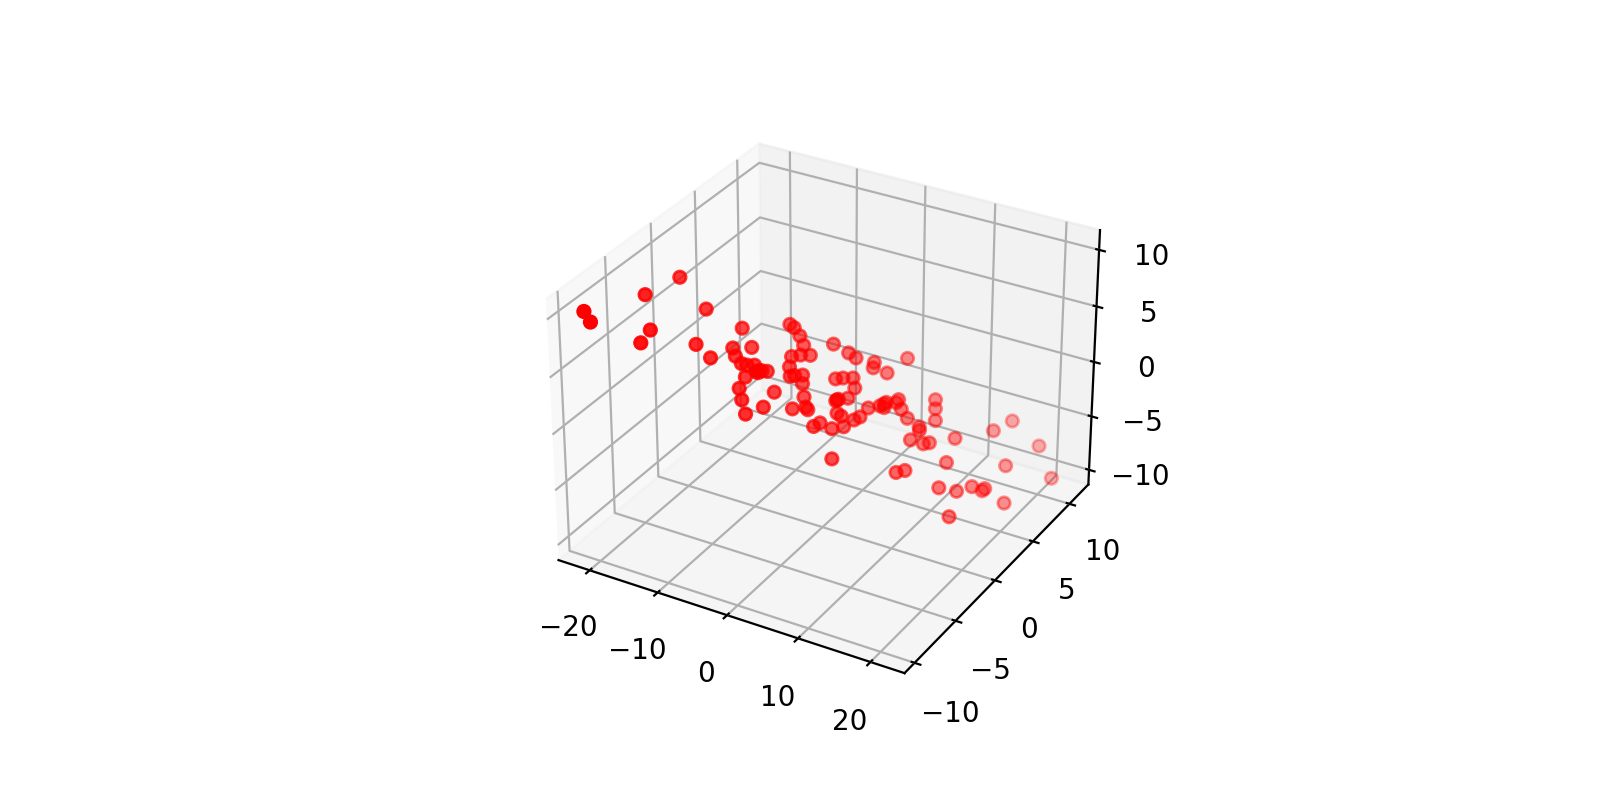

In [4]:
U, S, V = la.svd(X,full_matrices=False)

print(S)
US = U@np.diag(S);

S_2d = S
S_2d[2] = 0
print(S_2d)
X_2d = U@np.diag(S_2d)@V
# X_2d = U_2 \Sigma_2  V_2^T
#      = U   \Sigma_2d V^T

print(US[0:5,:])

US_2d = U@np.diag(S_2d)

print(US_2d[0:5,:])


S_1d = S_2d
S_1d[1] = 0
print(S_1d)
X_1d = U@np.diag(S_1d)@V

%matplotlib notebook
fig = plt.figure(21)
ax = fig.add_subplot(111, projection="3d")
p = ax.scatter(X[:, 0], X[:, 1], X[:, 2])
p2 = ax.scatter(X_2d[:, 0], X_2d[:, 1], X_2d[:, 2],c='r')
p1 = ax.scatter(X_1d[:, 0], X_1d[:, 1], X_1d[:, 2],c='g')




In [10]:
# X is n x p 

U, S, V = la.svd(X,full_matrices=False) # "economy SVD" in class notes
print(X.shape)
print(U.shape)
print(V.shape)


U, S, V = la.svd(X,full_matrices=True) # "full SVD" in class notes
print(X.shape)
print(U.shape)
print(V.shape) # here V is the basis for the 3d space spanned by the n points in X (because we computed the SVD of X)
print(S.shape)

(100, 3)
(100, 3)
(3, 3)
(100, 3)
(100, 100)
(3, 3)
(3,)


In [11]:
# X.T is p x n

U, S, V = la.svd(X.T,full_matrices=False) # "economy SVD" in class notes
# if the points lie in an r-dimensional subspace, that means only r singular values are non-zero
# and the other p-r singular values = 0
# the economy SVD only gives us basis vectors that correspond to NON-ZERO singular values
# so in this case, U will be p x r. 
print(X.T.shape)
print(U.shape)
print(V.shape)



U, S, V = la.svd(X.T,full_matrices=True) # "full SVD" in class notes
# U will be a basis for the full p-dimensional space, *even if the points lie in a lower-dim subspace*
# if the points are in an r-dim subspace, the first r columns of U are a basis for that subspace
# and the remaining p-r columns of U are a basis to the orthogonal subspace
# the first r columns of U from the "full SVD" = the columns of U from the "economy SVD"
print(X.T.shape)
print(U.shape) # here U is the basis for the 3d space spanned by the n points in X (because we computed the SVD of X.T)
print(V.shape)
print(S.shape)

# if you want U ~ p x p to be the basis for your p-dim space, then always compute the SVD of a p x n matrix

(3, 100)
(3, 3)
(3, 100)
(3, 100)
(3, 3)
(100, 100)
(3,)
